[41  3 12 14 33 13 16 26 18 20  7 11 23  3 42 24 18 43 42  3 10  4 27 40
 12 22  2 44 27 13  3 20 34 25 29 41 13 34  6 35 16 12 16 27 43  8  3 36
 19 29 34 22 12  8  4  3 25 12 28 40 32 21 29 13  8 19 12 28 47 29 26 18
 31 42 48 41 38 31 37 30 43 42 43 43 40 28 27 22 15  9 44 19 49 13 28  6
 25 26 13  5 36  6 39 23  6 39 10 39 34 44  2 10 30 18 34 19 12 28 21 19
  4 27  3 28 32 13  7 44 41 17 11 45 46 11 33 42 41 10  6 43 49 47 37 47
 12 44 37 26 19  4 44 21 46 15 46 38 19 23 17 44 29 28  8 45 13  2 18 30
 36 34 23 47 43 16 25 30 36 45 40 20 47 26 39  2 33 14 17 21 35 33 35 46
 18 19 37 40  2 37  3 38 13 38  4 11 10 18 33 39 27 41  1  6 15 47  7 31
 49 16 30 46 35 16 15 25 29 49  3 31 45 35 25  6 44 47 20  4 44 19 12 36
 41  2  8 36 15 20 20 30 34 34 27 14 17  3 32 27 29 45 35 44 43 32  7 30
 43 22 32  1 48  1  9 12 44 46 31  5  7 14 32 30 17  5 46 13 40 19 24 24
 14 13  9 18  7 11 14 47 16 39 48 49 23 14 31 31 17  7 14  4 15 13  3 31
  3 14 35 43  7 31  8 34 11 37 37 24  3 20 34 19 15

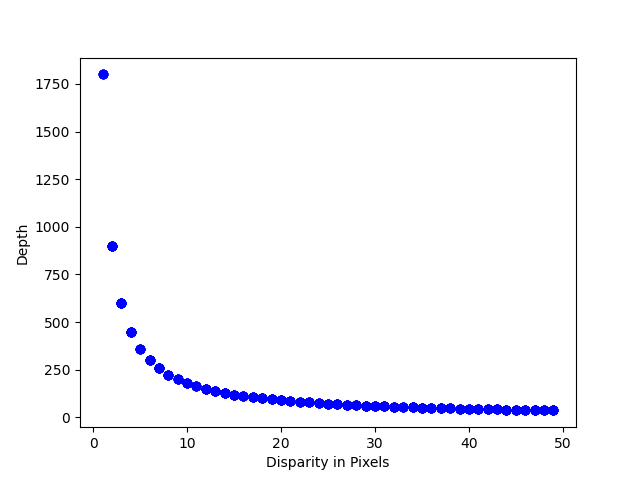

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Summary:
# My naive approach to understand why deriving at absolute depth from disparity loses accuracy after a particular and somewhat near distance ~ 1 meter. 

# Background: 
# We are able to acquire disparity map from iPhone's portrait photos.  From that we try to derive at an absolute depth information using the most intuitive conversion
# i.e. depth = 1 / disparity
# However this conversion made it very apparent that after 1.5m of distance, the derived values of absolute depth would become coarse.

# Theory:
# I wanted to entertain the idea of actually calculating the absolute depth more precisely using focal length, baseline and disparity values.  
# i.e. Z = focal_length * baseline / disparity
# I expected the results to be more consistent with uniform density even after 1 meter.

# However in order to calculate focal length in pixel, we needed some camera specifications such as focal length in mm, sensor width and image width.
# i.e. focal_length_px = (focal_length_mm / sensor_width_mm) * image_width_in_pixels
# Ref: https://www.reddit.com/r/AskPhotography/comments/oebv06/iphone_12_pro_main_camera_sensor_size/

# Findings:
# Even after calculating absolute depth by focal length and baseline, the same pattern repeated; I lost granularity in absolute depth after 1 meter.
# It was apparent that there wasn't a linear correlation and I should have easily picked that up from 1 / disparity equation. 
# Furthermore, the baseline and focal-length only allowed granularity up to 1 meter. 
# If the baseline was increased to 545mm, then, the granularity of depth extends to 3.5 meters.  This made more sense because when the baseline increases, 
# the depth resolution increases as well. 

iphone_focal_length_mm = 13
iphone_sensor_width_mm = 4.2336
iphone_image_width_px = 4042
iphone_baseline_mm = 145

# focal_length_px = (focal_length_mm / sensor_width_mm) * image_width_in_pixels
focal_length_px = (iphone_focal_length_mm / iphone_sensor_width_mm) * iphone_image_width_px

# Z = focal_length * baseline / disparity
# where
# Z = Distance along the camera Z axis
# focal_length = focal length (in pixels)
# baseline = baseline (in metres)
# disparity = disparity (in pixels)

def toDepth(disparity_px):
    iphone_baseline_m = iphone_baseline_mm / 1000
    return (focal_length_px * iphone_baseline_m) / disparity_px

def inverse(disparity_px):
    return 1 / disparity_px
  
sample_disparity_values = np.random.randint(low=1,high=50,size=500)
print(sample_disparity_values)

depth = list(map(toDepth, sample_disparity_values))
# print(depth)

plt.xlabel('Disparity in Pixels')
plt.ylabel('Depth')
plt.scatter(sample_disparity_values, depth, c='b')
plt.show()

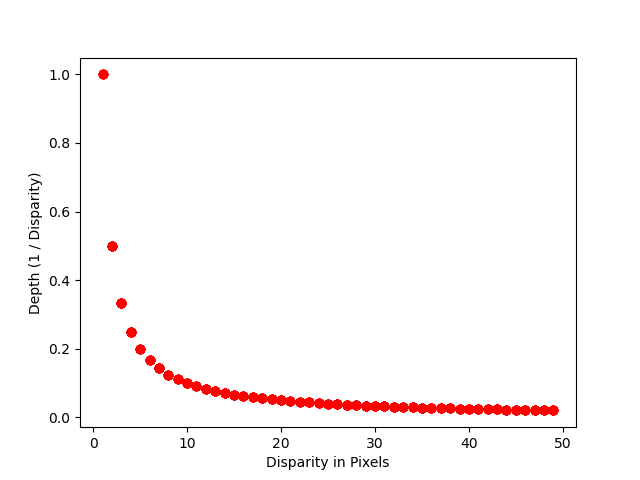

In [61]:
inversed = list(map(inverse, sample_disparity_values))
# print(inversed)

plt.xlabel('Disparity in Pixels')
plt.ylabel('Depth (1 / Disparity)')
plt.scatter(sample_disparity_values, inversed, c='r')
plt.show()


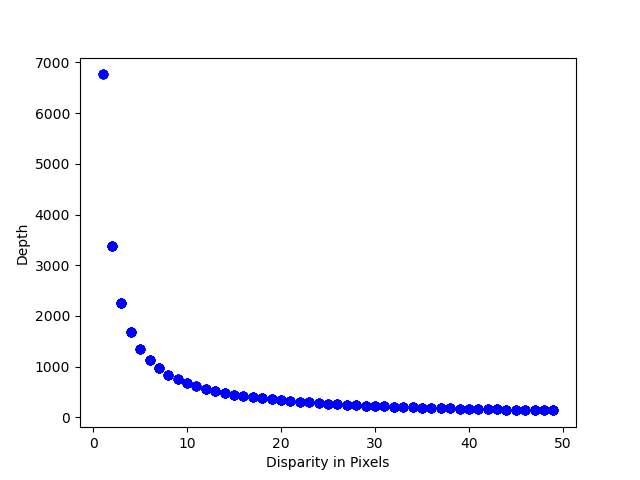

In [62]:
# Let's increase the baseline to get higher depth resolution
iphone_baseline_mm = 545
depth = list(map(toDepth, sample_disparity_values))

plt.xlabel('Disparity in Pixels')
plt.ylabel('Depth')
plt.scatter(sample_disparity_values, depth, c='b')
plt.show()